In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from scipy.stats.mstats import winsorize

import numpy as np
import math


In [2]:
inventory = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\inventory.csv')
products = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\products.csv')
sales = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\sales.csv')
stores = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\stores.csv')

In [3]:
inventory.head()


,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [4]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [5]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,9.99,15.99
1,2,Animal Figures,Toys,9.99,12.99
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99
3,4,Chutes & Ladders,Games,9.99,12.99
4,5,Classic Dominoes,Games,7.99,9.99


In [6]:
stores.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [7]:
sales1 = pd.merge(sales, products, on='Product_ID')
sales2 = pd.merge(sales1, stores, on='Store_ID')


sales2['sales'] = sales2['Units'] * sales2['Product_Price']
sales2['cost'] = sales2['Units'] * sales2['Product_Cost']



##Changing the data column into date format
sales2['Date'] = pd.to_datetime(sales2['Date'])
sales2.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,sales,cost
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
3,128,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
4,146,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99


In [8]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829262 entries, 0 to 829261
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Store_ID          829262 non-null  int64         
 3   Product_ID        829262 non-null  int64         
 4   Units             829262 non-null  int64         
 5   Product_Name      829262 non-null  object        
 6   Product_Category  829262 non-null  object        
 7   Product_Cost      829262 non-null  float64       
 8   Product_Price     829262 non-null  float64       
 9   Store_Name        829262 non-null  object        
 10  Store_City        829262 non-null  object        
 11  Store_Location    829262 non-null  object        
 12  Store_Open_Date   829262 non-null  object        
 13  sales             829262 non-null  float64       
 14  cost

In [9]:
sales2.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
sales               0
cost                0
dtype: int64

In [74]:
Weekly_sales = sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week'),'Product_ID','Store_ID'])['sales'].sum().reset_index()





Weekly_sales = Weekly_sales.merge(sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week'),'Product_ID','Store_ID'])['Units'].sum().reset_index())


In [50]:
sales_monthly_test

,year,Product_ID,Store_ID,sales,cost,Units
week,,,,,,
2016-12-26/2017-01-01,2017,1,4,95.94,59.94,6
2016-12-26/2017-01-01,2017,1,9,143.91,89.91,9
2016-12-26/2017-01-01,2017,1,10,63.96,39.96,4
2016-12-26/2017-01-01,2017,1,21,207.87,129.87,13
2016-12-26/2017-01-01,2017,1,28,95.94,59.94,6
...,...,...,...,...,...,...
2018-09-24/2018-09-30,2018,35,16,183.77,91.77,23
2018-09-24/2018-09-30,2018,35,22,23.97,11.97,3
2018-09-24/2018-09-30,2018,35,26,111.86,55.86,14


In [75]:
Weekly_sales

,year,week,Product_ID,Store_ID,sales,Units
0,2017,2016-12-26/2017-01-01,1,4,95.94,6
1,2017,2016-12-26/2017-01-01,1,9,143.91,9
2,2017,2016-12-26/2017-01-01,1,10,63.96,4
3,2017,2016-12-26/2017-01-01,1,21,207.87,13
4,2017,2016-12-26/2017-01-01,1,28,95.94,6
...,...,...,...,...,...,...
55757,2018,2018-09-24/2018-09-30,35,16,183.77,23
55758,2018,2018-09-24/2018-09-30,35,22,23.97,3
55759,2018,2018-09-24/2018-09-30,35,26,111.86,14
55760,2018,2018-09-24/2018-09-30,35,41,47.94,6


In [30]:
sales_monthly_test.set_index("week", inplace = True)

In [83]:
RFR = Weekly_sales.drop(['year','Product_ID','Store_ID'], axis=1)

In [84]:
RFR

,week,sales,Units
0,2016-12-26/2017-01-01,95.94,6
1,2016-12-26/2017-01-01,143.91,9
2,2016-12-26/2017-01-01,63.96,4
3,2016-12-26/2017-01-01,207.87,13
4,2016-12-26/2017-01-01,95.94,6
...,...,...,...
55757,2018-09-24/2018-09-30,183.77,23
55758,2018-09-24/2018-09-30,23.97,3
55759,2018-09-24/2018-09-30,111.86,14
55760,2018-09-24/2018-09-30,47.94,6


In [31]:
sales_monthly_test

,year,Product_ID,Store_ID,sales,cost,Units
week,,,,,,
2016-12-26/2017-01-01,2017,1,4,95.94,59.94,6
2016-12-26/2017-01-01,2017,1,9,143.91,89.91,9
2016-12-26/2017-01-01,2017,1,10,63.96,39.96,4
2016-12-26/2017-01-01,2017,1,21,207.87,129.87,13
2016-12-26/2017-01-01,2017,1,28,95.94,59.94,6
...,...,...,...,...,...,...
2018-09-24/2018-09-30,2018,35,16,183.77,91.77,23
2018-09-24/2018-09-30,2018,35,22,23.97,11.97,3
2018-09-24/2018-09-30,2018,35,26,111.86,55.86,14


In [20]:
#############Importing packages##############
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [88]:



x = RFR.iloc[:,2:].values 
print(x)
y = RFR.iloc[:, 1:2].values
print(y)





[[ 6]
 [ 9]
 [ 4]
 ...
 [14]
 [ 6]
 [17]]
[[ 95.94]
 [143.91]
 [ 63.96]
 ...
 [111.86]
 [ 47.94]
 [135.83]]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [151]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (44609, 1)
Training Labels Shape: (44609, 1)
Testing Features Shape: (11153, 1)
Testing Labels Shape: (11153, 1)


In [109]:
X_test

array([[20],
       [12],
       [ 9],
       ...,
       [41],
       [ 4],
       [ 1]], dtype=int64)

In [110]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
X_train

array([[ 1.3312145 ],
       [ 2.59271331],
       [-0.73764353],
       ...,
       [-0.88902339],
       [-0.08166415],
       [ 0.37247541]])

In [112]:
X_test

array([[ 0.01925575],
       [-0.38442387],
       [-0.53580372],
       ...,
       [ 1.07891474],
       [-0.78810348],
       [-0.93948334]])

In [128]:
regressor = RandomForestRegressor(n_estimators=20, random_state=1)
regressor.fit(X_train, y_train)

y_train_predict = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

<ipython-input-128-bcd161c24bbb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [131]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred,y_test))
MSE = print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
RMSE = print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 121.7374229363658
Mean Squared Error: 58097.59624329171
Root Mean Squared Error: 241.03442958069644
None


In [125]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  255.91


Text(0.5, 1.0, 'Train Data')

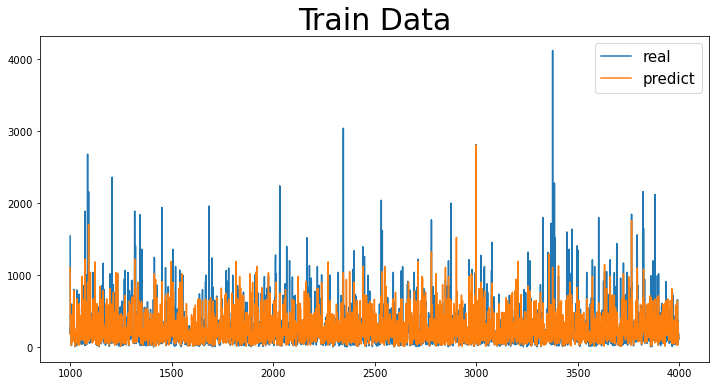

In [145]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[1000:4000,0].plot(figsize=(12,6))
draw.iloc[1000:4000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30')

Text(0.5, 1.0, 'Test Data')

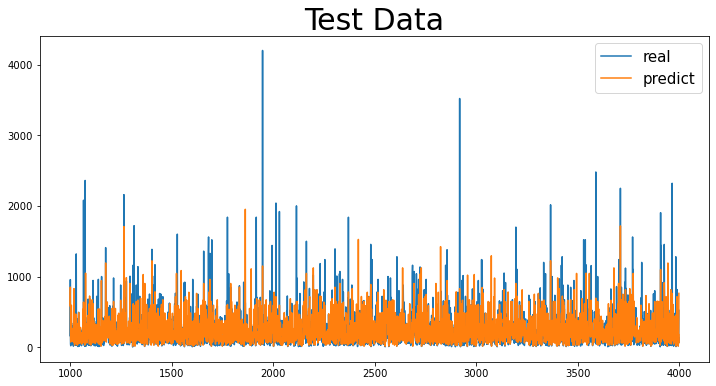

In [146]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1);
draw.iloc[1000:4000,0].plot(figsize=(12,6))
draw.iloc[1000:4000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30')